# Assignment03 
* 20165396 박범진


## 1. Input points

Plot a set of points that are loaded from data.csv in black color

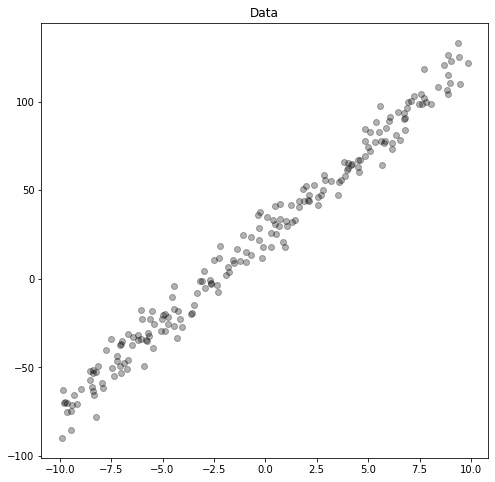

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Path 설정 및 파일 불러오기
path = 'data.csv'
data = np.genfromtxt(path, delimiter=',')

# X, Y 나누기
x_data = data[:,0]
y_data = data[:,1]

# Plot
plt.figure(figsize=(8,8))
plt.scatter(x_data, y_data, alpha=0.3, color='black')
plt.title('Data')
plt.show()


## 2. Linear Regression result

Plot a set of points that are loaded from data.csv file in black color and plot a straight line obtained by optimal linear regression based on the given set of points in red color. 
The estimated straight line is superimposed on the set of points

In [0]:
# Model : y = theta0 + theta1 * x
theta0, theta1 = -30, -30
lr = 0.01
m = len(x_data)

def func(x): # Linear Regression Model
  y = theta0 + theta1*x
  return y

J = m * sum([(func(x_data[i]) - y_data[i])**2 for i in range(m)])/2     #Initial Loss

# Store the values for plotting
THETA0 =[theta0]
THETA1 =[theta1]
LOSS = [J]

# Linear Regression
while True:
  temp = (theta0, theta1)
  theta0 = theta0 - lr *  sum([func(x_data[i]) - y_data[i] for i in range(m)]) /m
  theta1 = theta1 - lr * sum([(func(x_data[i]) - y_data[i])*x_data[i] for i in range(m)])/m
  J = m * sum([(func(x_data[i]) - y_data[i])**2 for i in range(m)])/2
  THETA0.append(theta0)
  THETA1.append(theta1)
  LOSS.append(J)
  if (theta0-temp[0])<0.01 and (theta1-temp[1])<0.01:   # Convergence when the thetas don't change. 
    break


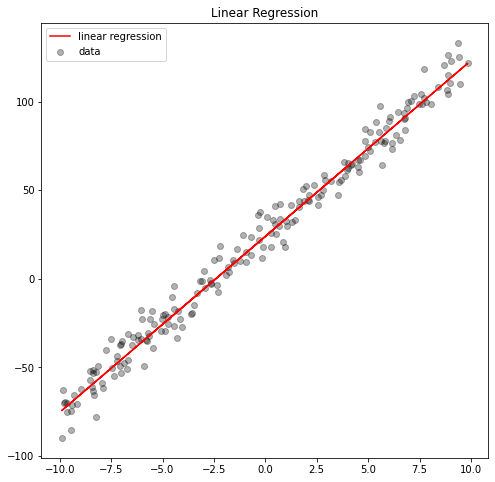

In [126]:
H = [func(x) for x in x_data]
plt.figure(figsize=(8,8))
plt.scatter(x_data, y_data, alpha=0.3, color='black')
plt.plot(x_data, H, color='r')
plt.title('Linear Regression')
plt.legend(['linear regression', 'data'])

## 3. Plot the energy surface 

plot the energy surface 

$(\theta_0, \theta_1, J(\theta_0, \theta_1))$ with

$\theta_0 = [-30 : 0.1 : 30]$

$\theta_1 = [-30 : 0.1 : 30]$


Text(0.5, 0.92, 'Energy Surface')

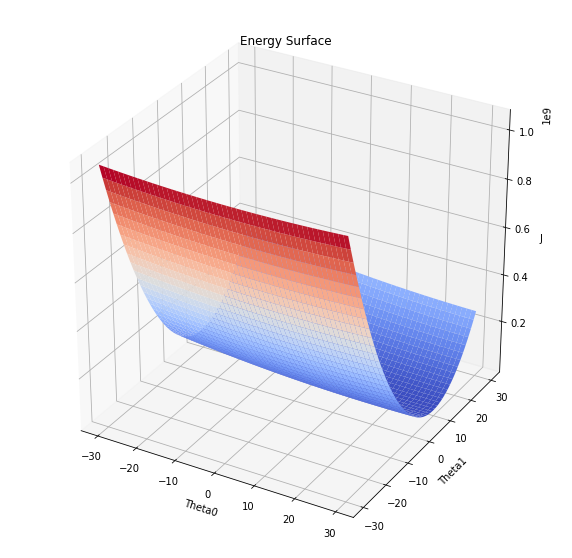

In [161]:
def J(t0, t1):  # Theta0, Theta1에 대한 Loss 계산하는 함수
    return m * sum([((t0 + t1* x_data[i]) - y_data[i])**2 for i in range(m)])/2

# -30 ~ 30 까지의 Theta0 와 Theta1

theta0 = np.arange(-30, 30, 0.1)
theta1 = np.arange(-30, 30, 0.1)

T0, T1 = np.meshgrid(theta0, theta1) # 2차원으로 만들기
Z = J(T0, T1) # 함수에 적용

# Plot 
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(T0, T1, Z, cmap='coolwarm')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('J')
ax.set_title('Energy Surface')